# Exploring Variables

Original Variables:
- geostrophic velocity anomalies
- wind speed
- wind stress

Options to Explore:

- geostrophic velocity error bars from CMEMS gridded level 3 product
- cyclostrophic adjustments to the velocities due to the centrifugal term
- SST gradient 
- mixed layer depth 
- bathymetry
- drogue status 

## Derived Quantities
### Cyclostrophic Adjusted Geostrophic Velocities

Cyclostrophic currents are those that arise due to the curvature of a flow and thus are ubiquitous across the ocean due to the ocean's abundance of mesoscale and submesoscale eddies. The iterative scheme is given by:

$\vec{u}^{(\mathrm{n}+1)}=\vec{u}_{g}+\frac{\vec{k}}{f} \times\left(\vec{u}^{(n)} \cdot \nabla \vec{u}^{n}\right),$

where
* $\vec{k}$ - vertical unit vector
* $f$ - Coriolis parameter
* $\vec{u}_g$ - geostrophic velocity

This iteration scheme adjusts the velocity to include influences that are due to centrifugal force. The iteration stops when $|\vec{u}^{n+1} - \vec{u}^n|\leq 0.01$ or increases. The iteration scheme is initialised with $\vec{u}^{(0)} = \vec{u}_g$

In [1]:
import xarray as xr
import matplotlib.pyplot as plt

## Data

* **Geostrophic Velocities**: Copernicus *Global Ocean Gridded L4 Sea Surface Heights And Derived Variables Reprocessed 1993 Ongoing* dataset
* **Wind Stress and Speed**: Copernicus *Global Ocean Hourly Sea Surface Wind and Stress from Scatterometer and Model* dataset

Loading data:

In [2]:
file_directory = "D:\PhD\ocean-datasets\gdp-data"
filename = "drifter_6hour.nc"
filepath = f"{file_directory}/{filename}"
dataset = xr.open_dataset(filepath)

<xarray.Dataset>
Dimensions:              (row: 4468461)
Dimensions without coordinates: row
Data variables: (12/35)
    ID                   (row) object ...
    WMO                  (row) float64 ...
    expno                (row) float64 ...
    time                 (row) datetime64[ns] ...
    latitude             (row) float64 ...
    longitude            (row) float64 ...
    ...                   ...
    DrogueBallast        (row) object ...
    DragAreaAboveDrogue  (row) object ...
    DragAreaOfDrogue     (row) object ...
    DragAreaRatio        (row) object ...
    DrogueCenterDepth    (row) object ...
    DrogueDetectSensor   (row) object ...
Attributes: (12/54)
    acknowledgement:            Lumpkin, Rick; Centurioni, Luca (2019). Globa...
    cdm_data_type:              Trajectory
    cdm_trajectory_variables:   ID
    comment:                    Global Drifter Program 6h data
    contributor_name:           NOAA Global Drifter Program
    contributor_role:           Data Acquisition Center
    ...                         ...
    summary:                    Global Drifter Program 6-hourly drifting buoy...
    time_coverage_end:          2024-01-18T18:00:00Z
    time_coverage_start:        1980-02-24T12:00:00Z
    title:                      Global Drifter Program - 6 Hour Interpolated ...
    Westernmost_Easting:        -83.0
    wmo_platform_code:          3300654

In [12]:
dataset.where(dataset.err_lon < 0.25)

<xarray.Dataset>
Dimensions:              (row: 4468461)
Dimensions without coordinates: row
Data variables: (12/35)
    ID                   (row) object nan nan nan nan nan ... nan nan nan nan
    WMO                  (row) float64 nan nan nan nan nan ... nan nan nan nan
    expno                (row) float64 nan nan nan nan nan ... nan nan nan nan
    time                 (row) datetime64[ns] NaT NaT NaT NaT ... NaT NaT NaT
    latitude             (row) float64 nan nan nan nan nan ... nan nan nan nan
    longitude            (row) float64 nan nan nan nan nan ... nan nan nan nan
    ...                   ...
    DrogueBallast        (row) object nan nan nan nan nan ... nan nan nan nan
    DragAreaAboveDrogue  (row) object nan nan nan nan nan ... nan nan nan nan
    DragAreaOfDrogue     (row) object nan nan nan nan nan ... nan nan nan nan
    DragAreaRatio        (row) object nan nan nan nan nan ... nan nan nan nan
    DrogueCenterDepth    (row) object nan nan nan nan nan ... nan nan nan nan
    DrogueDetectSensor   (row) object nan nan nan nan nan ... nan nan nan nan
Attributes: (12/54)
    acknowledgement:            Lumpkin, Rick; Centurioni, Luca (2019). Globa...
    cdm_data_type:              Trajectory
    cdm_trajectory_variables:   ID
    comment:                    Global Drifter Program 6h data
    contributor_name:           NOAA Global Drifter Program
    contributor_role:           Data Acquisition Center
    ...                         ...
    summary:                    Global Drifter Program 6-hourly drifting buoy...
    time_coverage_end:          2024-01-18T18:00:00Z
    time_coverage_start:        1980-02-24T12:00:00Z
    title:                      Global Drifter Program - 6 Hour Interpolated ...
    Westernmost_Easting:        -83.0
    wmo_platform_code:          3300654

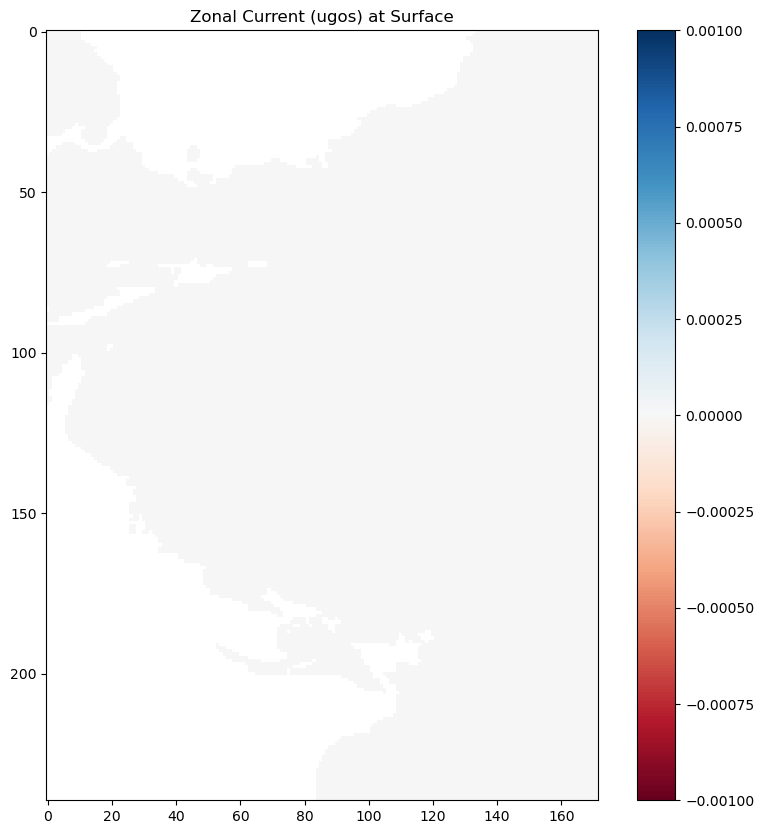

In [3]:
fig, ax1 = plt.subplots(figsize=(10, 10))

output_directory = "./"
output_filename="corrected_geostrophic_velocities_2022_2024.nc"
other_directory = "D:\PhD\ocean-datasets\copernicus-data"
other_file = "CMEMS_West_NA_currents_2022_2024.nc"
# Load the NetCDF file
data_path = f"{output_directory}/{output_filename}"
dataset = xr.open_dataset(data_path)
data_path1 = f"{other_directory}/{other_file}"
dataset1 = xr.open_dataset(data_path1)

ugos1 = dataset1['ugosa']
vgos1 = dataset1['vgosa']
ugos = dataset['u_corrected']
vgos = dataset['v_corrected']

vcgos = vgos1-vgos
# Plot the data for a specific time and depth
pos = ax1.imshow(vcgos.isel(time=000), cmap = 'RdBu',vmin=-0.001, vmax=0.001)
fig.colorbar(pos, ax = ax1)  

#ugos.isel(time=0).plot()
plt.title('Zonal Current (ugos) at Surface')
plt.show()